## 5. Hafta Ödevi

##### Selin Ulusoy

******

#### 1) One hot encoding modelin görmediği veriye nasıl uygulanır?

Çoğu makine öğrenmesi algoritması kategorik verilere doğrudan işlem yapamamaktadır. Bu yüzden verilerin sayısal veriye dönüştürülmeleri gerekir. Integer Encoding ve One Hot Encoding ile kategorik veriler sayısal veriye dönüştürülebilir. One Hot Encoding ile kategorik değerlerin ikili sistemde (binary) gösterilmesi sağlanır.

#### 2) Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)


Labelencoding, sıralanabilir yani ordinal kategorik değerlerin sayısal değere dönüştürülmesi için uyun bir encoding yöntemidir. Değerler sıralanabilir olduğu için encoding işleminden sonra da bu sıraya ugun olması beklenir. Ölçeklendirme için dikkat edilmesi gereken kural, kategorik verideki sıralamanın encoding işleminden sonra da aynı şekilde kalması gerekir. Örneğin Düşük, Orta ve Yüksek şeklindeki kategorik değer 1, 2 ve 3 olarak numaralanmalıdır. 

#### 3) Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

%3 ve %97 oranında dağılmış düzensiz bir veri seti düşünelim. Analiz kısmında model, verinin %97 lik kısmını doğru ve %3 lük kısmını yanlış kabul ettiğinde çok yüksek başarı oranı elde edebiliriz. Ancak azınlıkta olan %3 lük kısım tamamiyle yanlış değerlendirilmiş olur. Bu durumda modelin performansının yüksek olduğunu söyleyemeyiz ve undersampling, oversampling ve SMOTE (Synthetic Minority Over-sampling Technique) gibi tekniklere başvurmamız gerekir. Veri setinin train test ve validation setlerine bölünme şekli de performansı etkilemektedir. hold-out ve k-fold cross validation veri setini train ve test olarak ayırmak için kullanılabilecek yöntemlerdendir. Veri setini ayırırken dikkat edilmesi gereken bazı kurallar:
<li> Algoritma ne kadar çok veri ile eğitilirse öğrenme performansı da o kadar artacaktır. Bu nedenle train setindeki örnek sayısı test veri setindeki örnek sayısından fazla tutulur. 
<li> Eğitim ve test veri seti ayrımında örneklerin rastgele dağılması önemlidir. Eğer örnekler elle müdahale edilerek eğitim ve test veri setlerine dağıtılıyorsa, bu durum yapılacak analizin güvenilirliğini düşürecektir.
<li> Veri setinin eğitim ve test veri seti olarak bölünmesi sırasında hedef niteliğe ait sınıfın eğitim ve test veri setlerindeki dağılımına özen gösterilmelidir. Hem eğitim hem de test veri setinde, ana veri setindeki her bir sınıfa ait örnekler bulunmalıdır.

#### 4) Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Dataset en başta train, test ve validation olarak ayrılır, böylece oluşturulan makine öğrenmesi algoritmaları validation dataseti ile çalışmamış olur. Modelin validation setini öğrenmemesi gerçek bir durumda alacağımız sonuçları incelememiz açısından önemlidir. Ayrıca train ve test için uygulanacak adımlar validation için de geçerlidir. 

#### 5) predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

Predict ve predict_proba arasındaki fark, predict 0,1 gibi bir çıktı verirken, predict_probe y'nin 0 veya 1 olma olasılığını verir. Örneğin aşağıdaki gibi bir çıktı aldık;

[0.23, 0.77]

Bu durum noktanın 0 olma olasılığının % 23 ve noktanın 1 olma olasılığının % 77 olduğunu söylüyor.

Predict, tahmin değerlerini elde etmek için normal olarak kullanılabilir.

Ancak daha hassas sonuçlar beklediğimiz bir durumda, örneğin kanser teşhisi sorunu üzerinde çalışıyorsak, sınıf olasılık değerleri verecek olan predict_proba kullanabilir ve eşik (treshold) ayarlaması yapabilirz. Örneğin predict_proba_value > 0.98 ise 1, değilse 0 döndürmek gibi. Yani özetle predit_proba yardımıyla ihtiyaçlarımıza göre eşik ayarlayabiliriz.

#### 6) Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

In [3]:
df = pd.read_csv('auto_insurance_csv.csv')
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]
df1.head()

C:\Users\se-ul\AppData\Local\Temp/ipykernel_3976/2958899184.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')


,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000


In [4]:
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200)
df2 = df1.sort_values(by='incident_date',ascending=False).tail(800)

In [5]:
#incident_date e göre sıralandı
df1.sort_values(by='incident_date',ascending=False)

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
752,2015-03-01,IL,MISSING,0.0,441533,MALE,PhD,machine-op-inspct,other,unmarried,...,Chevrolet,Tahoe,1997,0,5718,False,9999,401-450,low,0-500
74,2015-03-01,IL,MISSING,0.0,472895,FEMALE,Associate,sales,other,wife,...,BMW,X6,2005,0,3972,False,36-40,201-250,medium,501-1000
914,2015-03-01,OH,MISSING,0.0,436364,FEMALE,JD,transport-moving,cross-fit,own-child,...,Honda,Accord,1998,0,5343,False,36-40,101-150,low,1501-2000
883,2015-03-01,OH,MISSING,0.0,479824,FEMALE,Associate,exec-managerial,other,not-in-family,...,Audi,A5,2005,1,3374,False,31-35,101-150,medium,501-1000
839,2015-03-01,OH,MISSING,0.0,448294,MALE,Associate,protective-serv,other,own-child,...,Dodge,Neon,2011,0,9106,False,41-45,201-250,medium,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2015-01-01,IN,MISSING,0.0,472814,FEMALE,JD,machine-op-inspct,other,other-relative,...,Ford,F150,2011,0,8397,False,26-30,101-150,high,0-500
457,2015-01-01,IL,100/300,0.0,470559,MALE,Masters,transport-moving,other,own-child,...,Volkswagen,Passat,2011,1,759,False,26-30,101-150,high,1501-2000
478,2015-01-01,IL,500/1000,9999,477260,MALE,Masters,armed-forces,chess,unmarried,...,Mercedes,C300,2001,1,6130,False,51-55,401-450,low,1501-2000
41,2015-01-01,IN,250/500,0.0,470577,MALE,Associate,transport-moving,chess,unmarried,...,BMW,X5,2001,1,854,False,9999,101-150,high,0-500


In [6]:
#incident_date sütunu iki verisetinden de kaldırıldı
df1_val = df1_val.drop(["incident_date"],axis=1)
df2 = df2.drop(["incident_date"],axis=1)

In [7]:
#kategorik kolonlar ayrıldı
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df2[col] = df2[col].astype('object')

columns_to_encode = []
for col in df2.columns:
  if df2[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [8]:
y = df1['fraud_reported']
X = df1.drop(['fraud_reported'], axis=1)

In [9]:
#veri train ve test olarak ayrıldı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)
display(X_test.shape)

(800, 35)

(200, 35)

In [10]:
#one hot encoder uygulandı
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = onehot_encoder.fit_transform(X_train[columns_to_encode]).toarray()
X_test_encoded = onehot_encoder.transform(X_test[columns_to_encode]).toarray()

In [11]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out())

In [12]:
#scaling (ölçeklendirme) aşaması

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.fit_transform(X_test_encoded)

In [13]:
#SMOTE ile oversampling aşaması
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_over, y_train_over = sm.fit_resample(X_train_scaled, y_train)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_train_over, y_train_over, test_size = 0.2, random_state = 1)

In [15]:
#Random Forest
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

88.52459016393442

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       116
           1       0.95      0.82      0.88       128

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244



<AxesSubplot:>

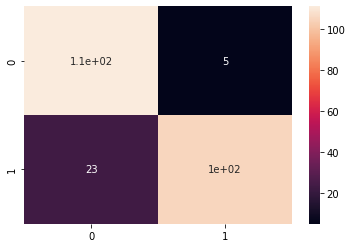

In [16]:
preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()

print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

86.47540983606558
Training Accuracy: 1.0
Testing Accuarcy:  0.865


<AxesSubplot:>

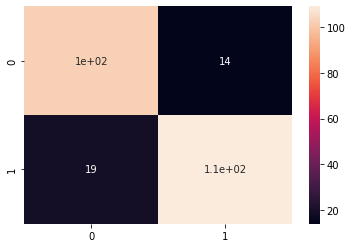

In [17]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
print(score*100)
print('Training Accuracy:', dtc.score(X_train, y_train))
print('Testing Accuarcy: ', round(dtc.score(X_test, y_test),3))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

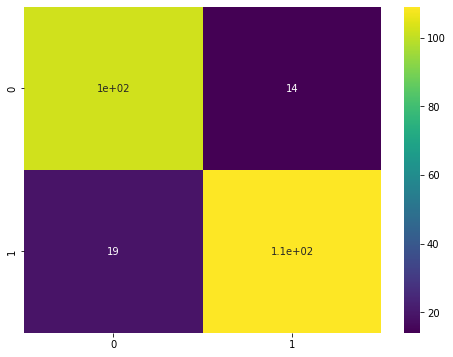

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       116
           1       0.89      0.85      0.87       128

    accuracy                           0.86       244
   macro avg       0.86      0.87      0.86       244
weighted avg       0.87      0.86      0.86       244



In [18]:
#Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.show()

#Classification report
cr = classification_report(y_test, preds)
print(cr)